In [3]:
#PYTHON CORRELATION PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8) #ADJUST THE CONFIGURATION OF THE PLOTS WE WILL CREATE

In [3]:
df=pd.read_csv("movies.csv")

In [4]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [8]:
#LET'S CLEAN OUR DATA BEFORE ANYTHING
#AND FIGURE OUT WHICH COLUMNS ARE CORRELATED WITH REVENUE

In [5]:
#LETS FIND IF THERE ARE SOME MISSING VALUES/NULL IN OUR DF
for column in df.columns:
    missing_percent=np.mean(df[column].isnull())
    print('{} - {}%'.format(column,missing_percent))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
df["budget"].isnull().value_counts().count()

2

In [12]:
#data cleaning time!
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#on our budget and gross columns we have a specific format for numbers, we want to get ride of that
#WE GO AHEAD AND GET STARTED BY CHANGING OUR DTYPE FROM THIS COLUMNS BUT FIRST WE NEED TO GET RIDE OF NA VALUE
#LETS FILL ALL NA VALUES AND STORE THIS ACTION IN A NEW DATA FRAME
new_df=df.interpolate(method="linear")
new_df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [10]:
new_df[["budget","gross"]]=new_df[["budget","gross"]].astype('int64')

In [11]:
#lets verify our datype
new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [16]:
#KEEP CLEANING!
#I NOTICED THAT OUR YEAR AND REALESED COLUMNS ARE INCONSISTENT lets create a Yeatcorrect coumn

In [12]:
new_df["Yearcorrect"]=new_df["year"].astype(str).str[:4] #indicates from whic level of string we are removing

In [13]:
new_df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980


In [14]:
#let's sort the data frame 
new_df=new_df.sort_values(by=["gross"],inplace=False,ascending=False)
new_df["votes"]=new_df["votes"].astype('int64')
new_df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997


In [20]:
pd.set_option("display.max_rows",None)# WE PULLED OUT A DF WITH A DISPLAY FOR ROWS

In [16]:
#LETS DROP DUPLICATES
new_df["company"].drop_duplicates().sort_values(ascending=False).head(5)


7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

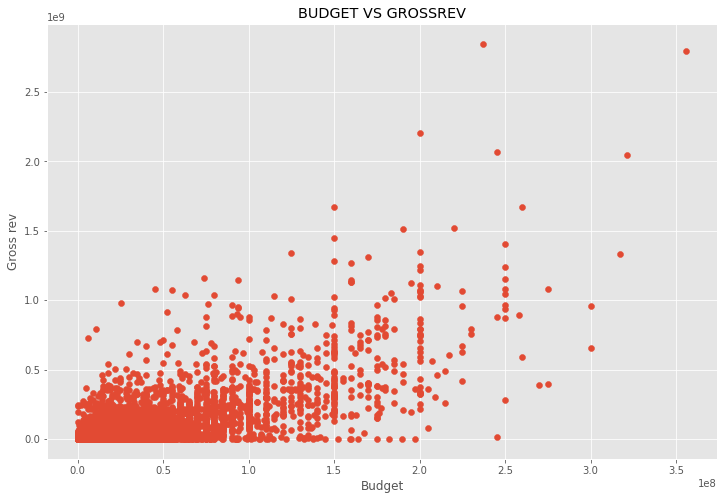

In [18]:
#LET'S START THE CORRELATION
#THE MORE MONEY THEY SPEND THE MORE REVENUE THEY WILL HAVE [BUDGET],[REVENUE]
#WE'LL SEE IF COMPANY WILL ALSO HAVE A HIGH CORRELATION

#LET'S COMPARE REVENUE AND BUDGET
#scatter plot budget vs revenue
plt.scatter(x=new_df["budget"],y=new_df["gross"])
plt.title("BUDGET VS GROSSREV")
plt.xlabel("Budget")
plt.ylabel("Gross rev")
plt.show()

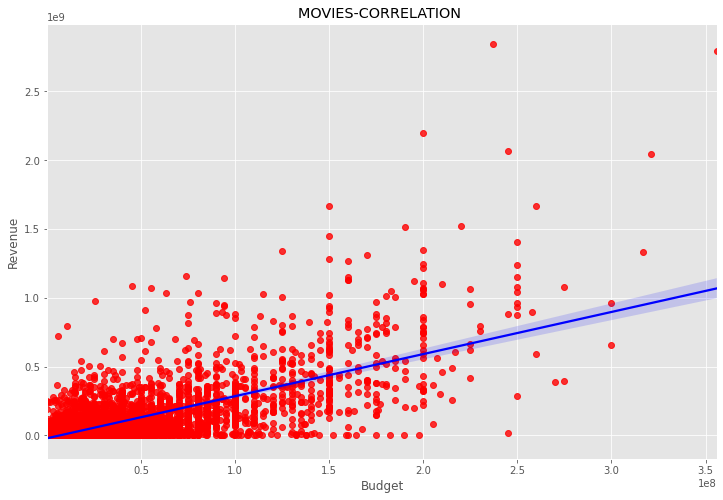

In [21]:
#LETS DETERMINE IF IT'S CORRELATED OR NOT
#regplot with seaborn (plot the budget vs gross)
sns.regplot(x="budget",y="gross",data=new_df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("MOVIES-CORRELATION ")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [22]:
#LET'S START LOOKING IN TO CORRELATION
new_df.corr(method="pearson") 
#corr will only be working with numerical numbers, we used pearson for this example correlation,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097130,0.222427,0.351959,0.259202,0.120760
score,0.097130,1.000000,0.409263,0.082440,0.186024,0.399309
votes,0.222427,0.409263,1.000000,0.449065,0.631279,0.309132
budget,0.351959,0.082440,0.449065,1.000000,0.705322,0.271556
gross,0.259202,0.186024,0.631279,0.705322,1.000000,0.243643
runtime,0.120760,0.399309,0.309132,0.271556,0.243643,1.000000


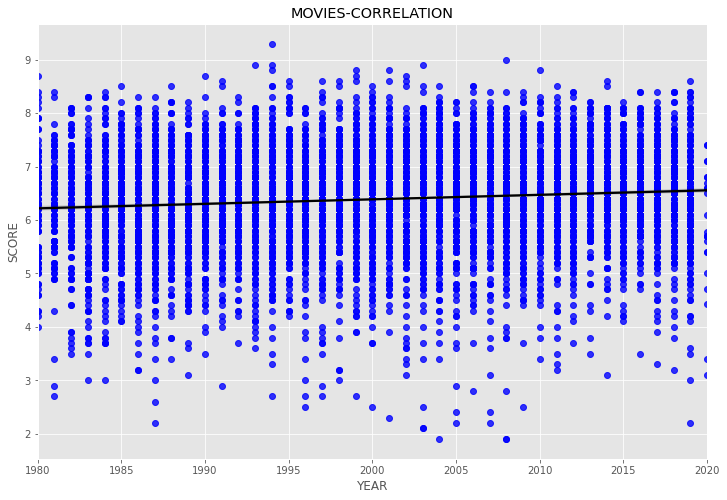

In [24]:
#Lets look in to another CORRELATION
sns.regplot(x="year",y="score",data=new_df,scatter_kws={"color":"blue"},line_kws={"color":"black"})
plt.title("MOVIES-CORRELATION")
plt.xlabel("YEAR")
plt.ylabel("SCORE")
plt.show()

In [25]:
#let's go ahead and try kendall and spearman correlation
new_df.corr(method="kendall").head(4)

,year,score,votes,budget,gross,runtime
year,1.000000,0.067054,0.330410,0.259122,0.202290,0.097244
score,0.067054,1.000000,0.300417,0.029518,0.088165,0.283254
votes,0.330410,0.300417,1.000000,0.344496,0.544670,0.197978
budget,0.259122,0.029518,0.344496,1.000000,0.404058,0.198408


In [26]:
new_df.corr(method="spearman").head(4)

,year,score,votes,budget,gross,runtime
year,1.000000,0.098172,0.468107,0.364736,0.295321,0.143073
score,0.098172,1.000000,0.428549,0.042877,0.129103,0.399379
votes,0.468107,0.428549,1.000000,0.488715,0.736009,0.289771
budget,0.364736,0.042877,0.488715,1.000000,0.560281,0.286560


In [29]:
#we can visualize our highest correlation on a plot (high correlation between budget and gross)

In [27]:
correlation_matrix=new_df.corr(method="pearson")

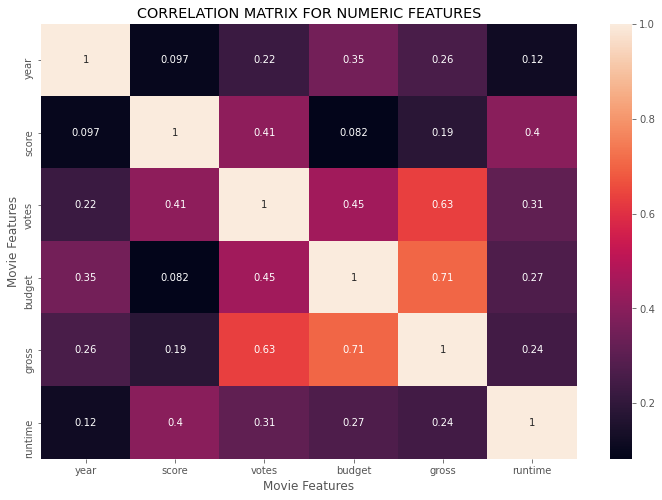

In [28]:
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION MATRIX FOR NUMERIC FEATURES")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [30]:
#let's look at our company correlations
pd.DataFrame(new_df["company"]).head(3)

,company
5445,Twentieth Century Fox
7445,Marvel Studios
3045,Twentieth Century Fox


In [32]:
#we can't correlate company unless we transform the frame in to a randomly numerical frame for having on our atributes numerical
df_numerized=new_df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes
            
df_numerized.head(5)
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [33]:
last_frame=df.sort_values(by=["gross"],inplace=False,ascending=False)
last_frame.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0


In [37]:
#VERIFYING THE CORRELATION FOR COMPANY

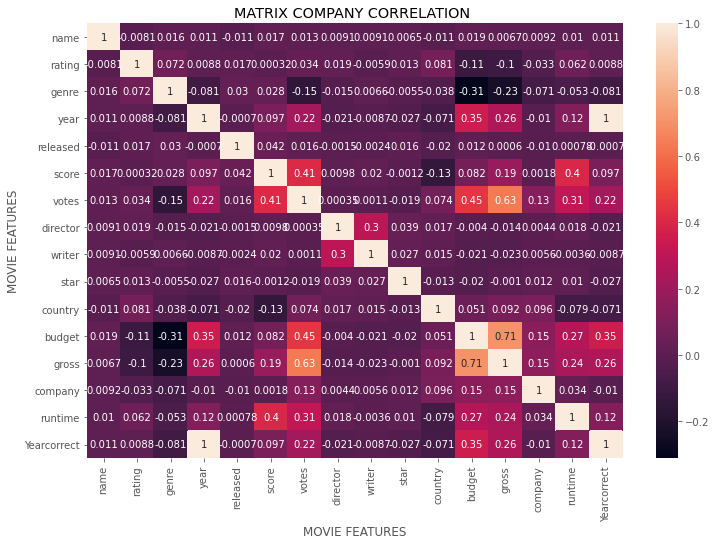

In [39]:
company_frame=df_numerized.corr(method="pearson")
sns.heatmap(company_frame,annot=True)
plt.title("MATRIX COMPANY CORRELATION ")
plt.xlabel("MOVIE FEATURES")
plt.ylabel("MOVIE FEATURES")
plt.show()

In [34]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()

In [35]:
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [36]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.311171
budget  genre    -0.311171
genre   gross    -0.230974
gross   genre    -0.230974
genre   votes    -0.145296
dtype: float64

In [67]:
#LET'S VERIFY WHICH VALUES HAS THE HIGHEST CORRELATION RATE IN COMPANY
high_correlation=sorted_pairs[(sorted_pairs)>0.5]
high_correlation.head()

votes   gross     0.631279
gross   votes     0.631279
        budget    0.705322
budget  gross     0.705322
name    name      1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings
#company has low correlation its not in the list of the highest correlations